In [3]:
country_pivot = country_analysis.pivot(index='country', columns='Type', values='value').fillna(0)
country_pivot


Type,Export,Import
country,,
AFGHANISTAN,7137.74,3928.96
ALBANIA,342.50,593.51
ALGERIA,10141.06,13296.07
AMERI SAMOA,4.90,8.73
ANDORRA,6.41,5.49
...,...,...
VIRGIN IS US,230.75,18.31
WALLIS F IS,0.43,1.36
YEMEN REPUBLC,9524.07,5446.80


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
exports=pd.read_csv('export_sections.csv')
imports=pd.read_csv('import_sections.csv')


exports['Type'] = 'Export'
imports['Type'] = 'Import'
#combine dataset
data = pd.concat([exports, imports])
data

missing_values = data.isnull().sum()


data['year'] = data['year'].astype(int)
data['value'] = data['value'].astype(float)

country_analysis = data.groupby(['country', 'Type'])['value'].sum().reset_index()
country_analysis


,country,Type,value
0,AFGHANISTAN,Export,7137.74
1,AFGHANISTAN,Import,3928.96
2,ALBANIA,Export,342.50
3,ALBANIA,Import,593.51
4,ALGERIA,Export,10141.06
...,...,...,...
487,YEMEN REPUBLC,Import,5446.80
488,ZAMBIA,Export,3320.77
489,ZAMBIA,Import,4964.95
490,ZIMBABWE,Export,1973.39


In [74]:
country_pivot['Trade Balance'] = country_pivot['Export'] - country_pivot['Import']
country_pivot

Type,country,Export,Import,Trade Balance
0,AFGHANISTAN,7137.74,3928.96,3208.78
1,ALBANIA,342.50,593.51,-251.01
2,ALGERIA,10141.06,13296.07,-3155.01
3,AMERI SAMOA,4.90,8.73,-3.83
4,ANDORRA,6.41,5.49,0.92
...,...,...,...,...
244,VIRGIN IS US,230.75,18.31,212.44
245,WALLIS F IS,0.43,1.36,-0.93
246,YEMEN REPUBLC,9524.07,5446.80,4077.27
247,ZAMBIA,3320.77,4964.95,-1644.18


In [41]:
country_pivot.to_csv('country_trade_analysis.csv')
country_pivot= country_pivot.reset_index()

<Figure size 1400x800 with 0 Axes>

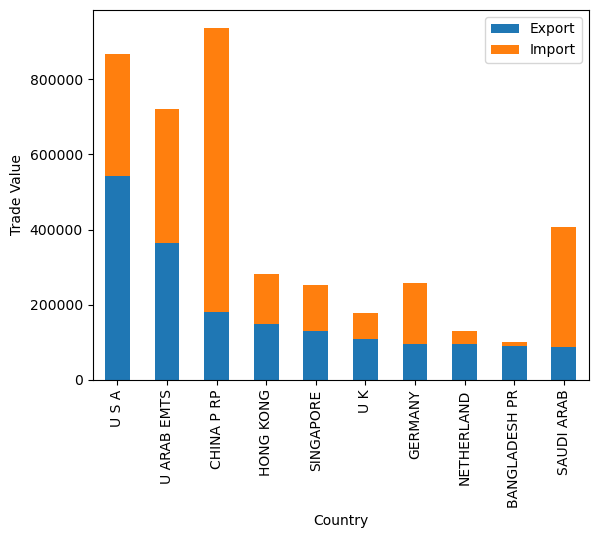

In [70]:
plt.figure(figsize=(14, 8))
top_countries = country_pivot_reset.sort_values(by=['Export', 'Import'], ascending=False).head(10)
top_countries[['Export', 'Import']].plot(kind='bar', stacked=True)
plt.title('')
plt.xlabel('Country')
plt.ylabel('Trade Value')
plt.xticks(ticks=range(len(top_countries)), labels=top_countries['country'])
plt.legend(loc='upper l')
plt.show()




In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
exports=pd.read_csv('export_sections.csv')
imports=pd.read_csv('import_sections.csv')


exports['Type'] = 'Export'
imports['Type'] = 'Import'
#combine dataset
data = pd.concat([exports, imports])
data


,HSCode,Commodity,value,country,year,Section,Type,State,Port,Month,quarter
0,2,MEAT AND EDIBLE MEAT OFFAL.,1.40,AFGHANISTAN,2010,I,Export,NaN,NaN,NaN,NaN
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.08,AFGHANISTAN,2010,I,Export,NaN,NaN,NaN,NaN
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,3.89,AFGHANISTAN,2010,I,Export,NaN,NaN,NaN,NaN
3,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN,2010,I,Export,NaN,NaN,NaN,NaN
4,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN,2010,II,Export,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
101046,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",0.02,ZIMBABWE,2021,XVI,Import,Karnataka,Mangalore Port,August,Q3
101047,85,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,0.00,ZIMBABWE,2021,XVI,Import,West Bengal,Haldia Port,July,Q3
101048,90,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",0.03,ZIMBABWE,2021,XVIII,Import,Maharashtra,JNPT (Nhava Sheva),March,Q1
101049,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,0.00,ZIMBABWE,2021,XXI,Import,Maharashtra,JNPT (Nhava Sheva),February,Q1


In [73]:
data['year'] = data['year'].astype(int)
data['value'] = data['value'].astype(float)

In [75]:
yearly_analysis = data.groupby(['year', 'country'])['value'].sum().reset_index()
yearly_analysis

,year,Type,value
0,2010,Export,249801.18
1,2010,Import,369762.25
2,2011,Export,305948.28
3,2011,Import,489311.81
4,2012,Export,300384.32
5,2012,Import,490730.07
6,2013,Export,314388.61
7,2013,Import,450192.99
8,2014,Export,310321.02
9,2014,Import,448026.63


In [78]:
yearly_pivot=yearly_analysis.pivot(index='year', columns='Type', values='value')
yearly_pivot

Type,Export,Import
year,,
2010,249801.18,369762.25
2011,305948.28,489311.81
2012,300384.32,490730.07
2013,314388.61,450192.99
2014,310321.02,448026.63
2015,262274.30,381000.97
2016,275835.27,384350.29
2017,303507.85,465574.02
2018,330058.64,514071.33


In [79]:
yearly_pivot['Trade Balance'] = yearly_pivot['Export'] - yearly_pivot['Import']
yearly_pivot

Type,Export,Import,Trade Balance
year,,,
2010,249801.18,369762.25,-119961.07
2011,305948.28,489311.81,-183363.53
2012,300384.32,490730.07,-190345.75
2013,314388.61,450192.99,-135804.38
2014,310321.02,448026.63,-137705.61
2015,262274.30,381000.97,-118726.67
2016,275835.27,384350.29,-108515.02
2017,303507.85,465574.02,-162066.17
2018,330058.64,514071.33,-184012.69


In [80]:
yearly_pivot.to_csv('year_wise.csv')


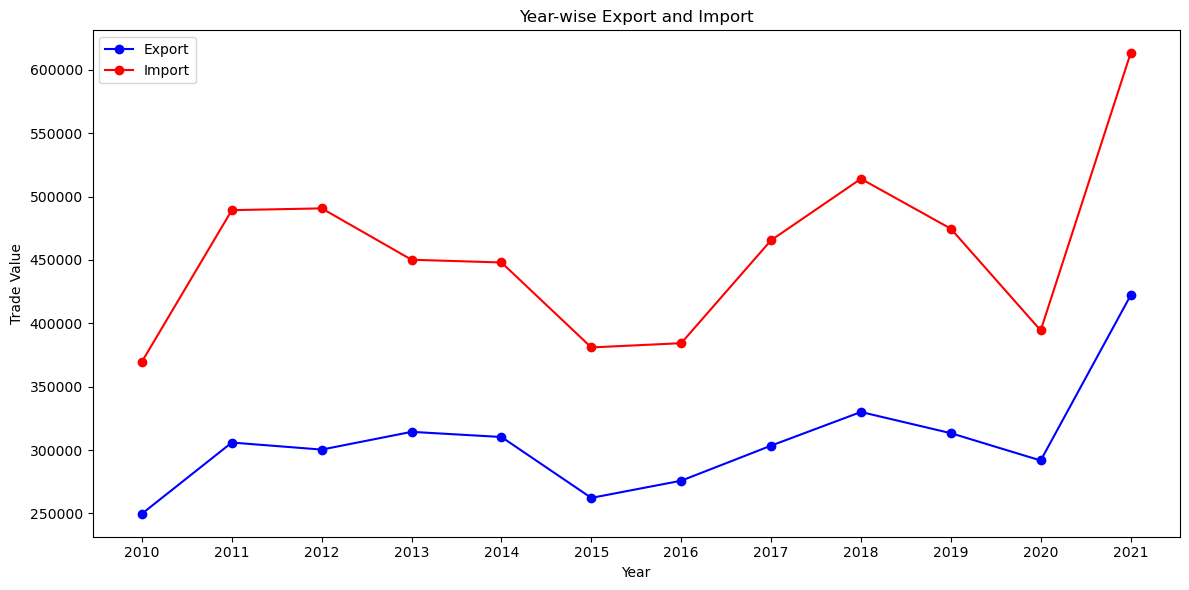

In [82]:
plt.figure(figsize=(12, 6))

plt.plot(yearly_pivot.index, yearly_pivot['Export'], marker='o', linestyle='-', color='b', label='Export')

plt.plot(yearly_pivot.index, yearly_pivot['Import'], marker='o', linestyle='-', color='r', label='Import')

plt.title('Year-wise Export and Import')
plt.xlabel('Year')
plt.ylabel('Trade Value')
plt.xticks(yearly_pivot.index)  
plt.legend()

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

NameError: name 'bwsw' is not defined

In [7]:
exports

,HSCode,Commodity,value,country,year,Section
0,2,MEAT AND EDIBLE MEAT OFFAL.,1.40,AFGHANISTAN,2010,I
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.08,AFGHANISTAN,2010,I
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,3.89,AFGHANISTAN,2010,I
3,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN,2010,I
4,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN,2010,II
...,...,...,...,...,...,...
184750,94,"FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...",0.19,ZIMBABWE,2021,XX
184751,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.03,ZIMBABWE,2021,XX
184752,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.31,ZIMBABWE,2021,XX
184753,98,PROJECT GOODS; SOME SPECIAL USES.,0.01,ZIMBABWE,2021,TOTAL


In [3]:
exports=pd.read_csv('export_sections.csv')
exports

NameError: name 'pd' is not defined

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
exports=pd.read_csv('export_sections.csv')
imports=pd.read_csv('import_sections.csv')

In [5]:
exports

,HSCode,Commodity,value,country,year,Section
0,2,MEAT AND EDIBLE MEAT OFFAL.,1.40,AFGHANISTAN,2010,I
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.08,AFGHANISTAN,2010,I
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,3.89,AFGHANISTAN,2010,I
3,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN,2010,I
4,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN,2010,II
...,...,...,...,...,...,...
184750,94,"FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...",0.19,ZIMBABWE,2021,XX
184751,95,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",0.03,ZIMBABWE,2021,XX
184752,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.31,ZIMBABWE,2021,XX
184753,98,PROJECT GOODS; SOME SPECIAL USES.,0.01,ZIMBABWE,2021,TOTAL


In [18]:
section_commodity_analysis = exports.groupby(['Section', 'Commodity'])['value'].sum().reset_index()
section_commodity_analysis

,Section,Commodity,value
0,I,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,4802.92
1,I,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",60394.39
2,I,LIVE ANIMALS.,368.06
3,I,MEAT AND EDIBLE MEAT OFFAL.,43611.13
4,I,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",1515.68
...,...,...,...
93,XVIII,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",31906.89
94,XX,"FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...",17503.93
95,XX,MISCELLANEOUS MANUFACTURED ARTICLES.,6295.00
96,XX,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",3796.43


In [19]:
section_commodity_analysis = section_commodity_analysis.sort_values(['Section', 'value'], ascending=[True, False])

In [20]:
section_commodity_analysis

,Section,Commodity,value
1,I,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",60394.39
3,I,MEAT AND EDIBLE MEAT OFFAL.,43611.13
0,I,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,4802.92
4,I,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",1515.68
2,I,LIVE ANIMALS.,368.06
...,...,...,...
92,XVIII,MUSICAL INSTRUMENTS; PARTS AND ACCESSORIES OF ...,241.36
94,XX,"FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPO...",17503.93
95,XX,MISCELLANEOUS MANUFACTURED ARTICLES.,6295.00
96,XX,"TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...",3796.43


In [12]:
section_commodity_analysis.to_csv('section_commodity_analysis.csv')

NameError: name 'section_commodity_analysis' is not defined

In [13]:
# Import Dependency Ratio(%)=( imports/totalsupply)*100

In [1]:
import pandas as pd
exports=pd.read_csv('export_sections.csv')
imports=pd.read_csv('import_sections.csv')


In [5]:
export_agg = exports.groupby('Commodity')['value'].sum().reset_index()
export_agg.rename(columns={'value': 'export_value'}, inplace=True)
export_agg

,Commodity,export_value
0,"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",31952.56
1,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,3224.26
2,ALUMINIUM AND ARTICLES THEREOF.,46875.96
3,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,13119.69
4,ARMS AND AMMUNITION; PARTS AND ACCESSORIES THE...,1244.95
...,...,...
93,"WADDING, FELT AND NONWOVENS; SPACIAL YARNS; TW...",4674.39
94,WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,4756.61
95,"WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YA...",1972.54
96,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,2179.16


In [9]:
import_agg = imports.groupby(['Commodity'])['value'].sum().reset_index()
import_agg.rename(columns={'value': 'import_value'}, inplace=True)
import_agg

,Commodity,import_value
0,"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",70627.54
1,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,5026.55
2,ALUMINIUM AND ARTICLES THEREOF.,46617.57
3,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,131471.56
4,ARMS AND AMMUNITION; PARTS AND ACCESSORIES THE...,571.54
...,...,...
93,"WADDING, FELT AND NONWOVENS; SPACIAL YARNS; TW...",3338.84
94,WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,26861.02
95,"WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YA...",4126.46
96,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,1102.69


In [14]:
# Merge the aggregated import data with export data
total_supply = pd.merge(import_agg, export_agg, on='Commodity', how='outer')

# Fill NaN values with 0 (in case some commodities are only imported or exported)
total_supply.fillna(0, inplace=True)

# Calculate total supply
total_supply['total_supply'] = total_supply['import_value'] + total_supply['export_value']
total_supply

,Commodity,import_value,export_value,total_supply
0,"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",70627.54,31952.56,102580.10
1,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,5026.55,3224.26,8250.81
2,ALUMINIUM AND ARTICLES THEREOF.,46617.57,46875.96,93493.53
3,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,131471.56,13119.69,144591.25
4,ARMS AND AMMUNITION; PARTS AND ACCESSORIES THE...,571.54,1244.95,1816.49
...,...,...,...,...
93,"WADDING, FELT AND NONWOVENS; SPACIAL YARNS; TW...",3338.84,4674.39,8013.23
94,WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,26861.02,4756.61,31617.63
95,"WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YA...",4126.46,1972.54,6099.00
96,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,1102.69,2179.16,3281.85


In [21]:
total_supply['import_dependency_ratio'] = (total_supply['import_value'] / total_supply['total_supply']) * 100

# Display the results
print(total_supply[['Commodity', 'import_dependency_ratio']])

                                            Commodity  import_dependency_ratio
0            AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.                68.851112
1   ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...                60.921897
2                     ALUMINIUM AND ARTICLES THEREOF.                49.861814
3   ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...                90.926360
4   ARMS AND AMMUNITION; PARTS AND ACCESSORIES THE...                31.463977
..                                                ...                      ...
93  WADDING, FELT AND NONWOVENS; SPACIAL YARNS; TW...                41.666594
94          WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.                84.955830
95  WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YA...                67.657977
96      WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.                33.599647
97                         ZINC AND ARTICLES THEREOF.                44.150165

[98 rows x 2 columns]


In [56]:
total=pd.merge(total_supply,section_commodity_analysis,on='Commodity',how='outer')
total

,Commodity,import_value,export_value,total_supply,import_dependency_ratio,Section,value
0,"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",70627.54,31952.56,102580.10,68.851112,XVII,31952.56
1,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,5026.55,3224.26,8250.81,60.921897,VI,3224.26
2,ALUMINIUM AND ARTICLES THEREOF.,46617.57,46875.96,93493.53,49.861814,XV,46875.96
3,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,131471.56,13119.69,144591.25,90.926360,III,13119.69
4,ARMS AND AMMUNITION; PARTS AND ACCESSORIES THE...,571.54,1244.95,1816.49,31.463977,XIX,1244.95
...,...,...,...,...,...,...,...
93,"WADDING, FELT AND NONWOVENS; SPACIAL YARNS; TW...",3338.84,4674.39,8013.23,41.666594,XI,4674.39
94,WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,26861.02,4756.61,31617.63,84.955830,IX,4756.61
95,"WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YA...",4126.46,1972.54,6099.00,67.657977,XI,1972.54
96,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,1102.69,2179.16,3281.85,33.599647,XXI,2179.16


In [60]:
total[total['Section']=='XI']['import_dependency_ratio'].mean()

33.42228329490943

In [24]:
total.to_csv('dependency_ratio.csv')

PermissionError: [Errno 13] Permission denied: 'dependency_ratio.csv'

In [32]:
plt.figure(figsize=(12, 8))
sn.barplot(data=total_supply, x='Commodity', y='import_dependency_ratio', hue='Section', palette='viridis')
plt.title('Import Dependency Ratio by Commodity and Section')
plt.xlabel('Commodity')
plt.ylabel('Import Dependency Ratio (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Section')
plt.tight_layout()
plt.show()

# Heatmap visualization
heatmap_data = total_supply.pivot('commodity', 'section', 'import_dependency_ratio')
plt.figure(figsize=(12, 8))
sn.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='viridis', linewidths=.5)
plt.title('Import Dependency Ratio Heatmap by Commodity and Section')
plt.xlabel('Section')
plt.ylabel('Commodity')
plt.show()

ValueError: Could not interpret input 'Section'

<Figure size 1200x800 with 0 Axes>

In [55]:
# total = total.groupby(['Section'])['import_dependency_ratio'].mean().reset_index()
# total